# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [134]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [157]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st



# Import API key
from weather_api_key import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [69]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

587

In [70]:
cities

['vaitupu',
 'asau',
 'lebu',
 'bredasdorp',
 'mar del plata',
 'hilo',
 'qaanaaq',
 'bluff',
 'rikitea',
 'mao',
 'kapaa',
 'kumsi',
 'ahipara',
 'kalmunai',
 'cockburn town',
 'acapulco',
 'albany',
 'hermanus',
 'hobart',
 'busselton',
 'taolanaro',
 'kloulklubed',
 'new norfolk',
 'soyo',
 'attawapiskat',
 'mys shmidta',
 'sao felix do xingu',
 'dikson',
 'airai',
 'sar-e pul',
 'punta arenas',
 'vaini',
 'hasaki',
 'atuona',
 'lagoa',
 'waingapu',
 'mataura',
 'egvekinot',
 'bouar',
 'pitimbu',
 'chuy',
 'cascais',
 'bethel',
 'itarema',
 'butaritari',
 'yellowknife',
 'puerto penasco',
 'esperance',
 'barrow',
 'ushuaia',
 'tasiilaq',
 'tsihombe',
 'fortuna',
 'port elizabeth',
 'tuktoyaktuk',
 'virbhadra',
 'zhigansk',
 'flinders',
 'jamestown',
 'mount gambier',
 'mahebourg',
 'galiwinku',
 'kudahuvadhoo',
 'ushumun',
 'yeraskhahun',
 'teguldet',
 'dryden',
 'nanortalik',
 'port alfred',
 'aruppukkottai',
 'burica',
 'bilibino',
 'mrirt',
 'hualmay',
 'bargal',
 'ancud',
 'leua

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [72]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
response = requests.get(url)
response.status_code

400

In [73]:
city_data = []

print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 2 of Set 1 | asau
Processing Record 3 of Set 1 | lebu
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | mar del plata
Processing Record 6 of Set 1 | hilo
Processing Record 7 of Set 1 | qaanaaq
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | mao
Processing Record 11 of Set 1 | kapaa
Processing Record 12 of Set 1 | kumsi
Processing Record 13 of Set 1 | ahipara
Processing Record 14 of Set 1 | kalmunai
Processing Record 15 of Set 1 | cockburn town
Processing Record 16 of Set 1 | acapulco
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 22 of Set 1 | kloulklubed
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [77]:
city_data_pd = pd.DataFrame(city_data)
city_data_pd

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,asau,46.4333,26.4000,51.96,68,99,1.41,RO,1651467799
1,lebu,-37.6167,-73.6500,50.49,93,3,12.91,CL,1651467799
2,bredasdorp,-34.5322,20.0403,54.57,93,98,5.03,ZA,1651467800
3,mar del plata,-38.0023,-57.5575,51.87,71,100,10.00,AR,1651467800
4,hilo,19.7297,-155.0900,74.28,100,100,8.99,US,1651467613
...,...,...,...,...,...,...,...,...,...
527,jibuti,11.5000,42.5000,80.08,57,44,9.60,DJ,1651467743
528,plymouth,41.8334,-70.8328,50.72,79,0,0.00,US,1651468042
529,prabumulih,-3.4500,104.2500,90.61,56,95,4.18,ID,1651468043
530,almaty,43.2500,76.9500,76.91,38,40,4.47,KZ,1651468043


In [78]:
city_data_pd.count()

City          532
Lat           532
Lng           532
Max Temp      532
Humidity      532
Cloudiness    532
Wind Speed    532
Country       532
Date          532
dtype: int64

In [79]:
city_data_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,5.320000e+02
mean,18.484201,17.841275,62.289361,69.494361,58.998120,7.646842,1.651468e+09
std,33.249135,89.403500,19.458015,21.302281,39.209539,4.830406,1.680261e+02
min,-54.800000,-179.166700,-4.200000,1.000000,0.000000,0.000000,1.651467e+09
25%,-7.094875,-65.309950,49.200000,60.000000,20.000000,4.155000,1.651468e+09
50%,21.322250,22.807300,65.165000,75.000000,74.500000,6.790000,1.651468e+09
75%,44.756800,97.450000,77.762500,85.000000,99.000000,10.360000,1.651468e+09
max,78.218600,178.416700,100.650000,100.000000,100.000000,25.990000,1.651468e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [98]:
#  Get the indices of cities that have humidity over 100%.
skip_city_data = city_data_pd.loc[city_data_pd["Humidity"] > 100]
len(skip_city_data)


0

In [99]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_pd.loc[city_data_pd["Humidity"] <= 100]
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,asau,46.4333,26.4000,51.96,68,99,1.41,RO,1651467799
1,lebu,-37.6167,-73.6500,50.49,93,3,12.91,CL,1651467799
2,bredasdorp,-34.5322,20.0403,54.57,93,98,5.03,ZA,1651467800
3,mar del plata,-38.0023,-57.5575,51.87,71,100,10.00,AR,1651467800
4,hilo,19.7297,-155.0900,74.28,100,100,8.99,US,1651467613
...,...,...,...,...,...,...,...,...,...
527,jibuti,11.5000,42.5000,80.08,57,44,9.60,DJ,1651467743
528,plymouth,41.8334,-70.8328,50.72,79,0,0.00,US,1651468042
529,prabumulih,-3.4500,104.2500,90.61,56,95,4.18,ID,1651468043
530,almaty,43.2500,76.9500,76.91,38,40,4.47,KZ,1651468043


In [102]:
# Export the city data into a .csv.
clean_city_data.to_csv(output_data_file, index_label="City_ID")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

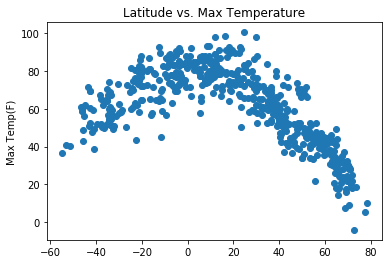

In [112]:
x=clean_city_data['Lat']
y=clean_city_data['Max Temp']
plt.scatter(x,y)
plt.xlabel=("Lat")
plt.ylabel("Max Temp(F)")
plt.title("Latitude vs. Max Temperature")

plt.savefig("output_data/scatter_Lat&Temp.png")
plt.show()

## Latitude vs. Humidity Plot

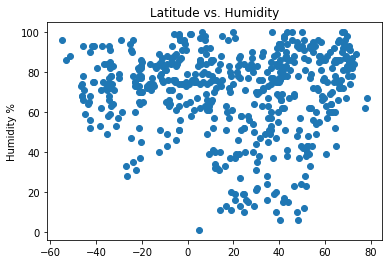

In [114]:
x=clean_city_data['Lat']
y=clean_city_data['Humidity']
plt.scatter(x,y)
plt.xlabel=("Lat")
plt.ylabel("Humidity %")
plt.title("Latitude vs. Humidity")

plt.savefig("output_data/scatter_Lat&Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

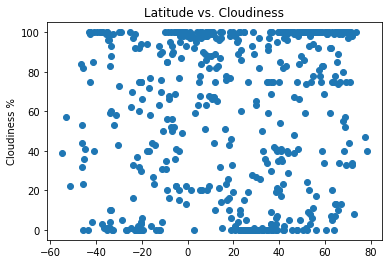

In [115]:
x=clean_city_data['Lat']
y=clean_city_data['Cloudiness']
plt.scatter(x,y)
plt.xlabel=("Lat")
plt.ylabel("Cloudiness %")
plt.title("Latitude vs. Cloudiness")

plt.savefig("output_data/scatter_Lat&Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

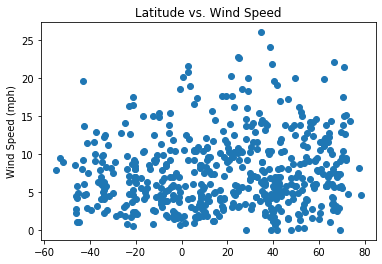

In [118]:
x=clean_city_data['Lat']
y=clean_city_data['Wind Speed']
plt.scatter(x,y)
plt.xlabel=("Lat")
plt.ylabel("Wind Speed (mph)")
plt.title("Latitude vs. Wind Speed")

plt.savefig("output_data/scatter_Lat&Wind Speed.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

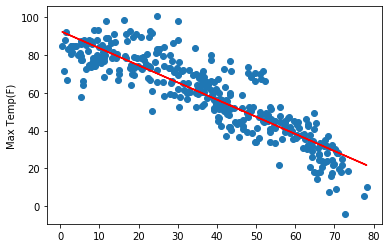

In [138]:
Northern=city_data_pd.loc[city_data_pd["Lat"] >=0]

x=Northern['Lat']
y=Northern['Max Temp']
plt.scatter(x,y)
plt.xlabel=('Lat')
plt.ylabel("Max Temp(F)")

slope, intercept = np.polyfit(x, y, 1)
plt.plot(x, slope*x + intercept, color="red")

plt.show()

In [141]:
N_correlation=round(st.pearsonr(Northern['Lat'],Northern['Max Temp'])[0],2)
N_correlation

-0.89

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

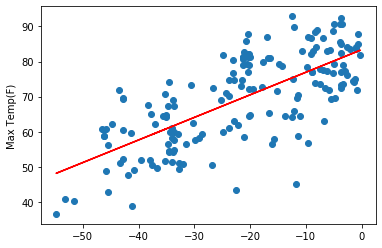

In [140]:
Southern=city_data_pd.loc[city_data_pd["Lat"] <0]

x=Southern['Lat']
y=Southern['Max Temp']
plt.scatter(x,y)
plt.xlabel=('Lat')
plt.ylabel("Max Temp(F)")

slope, intercept = np.polyfit(x, y, 1)
plt.plot(x, slope*x + intercept, color="red")

plt.show()

In [143]:
S_correlation=round(st.pearsonr(Southern['Lat'],Southern['Max Temp'])[0],2)
S_correlation

0.71

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

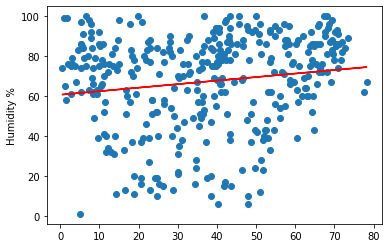

In [144]:
x=Northern['Lat']
y=Northern['Humidity']
plt.scatter(x,y)
plt.xlabel=('Lat')
plt.ylabel("Humidity %")

slope, intercept = np.polyfit(x, y, 1)
plt.plot(x, slope*x + intercept, color="red")

plt.show()

In [146]:
N_correlation=round(st.pearsonr(Northern['Lat'],Northern['Humidity'])[0],2)
N_correlation

0.15

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

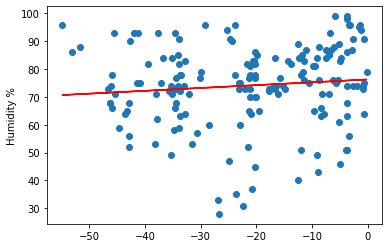

In [147]:
x=Southern['Lat']
y=Southern['Humidity']
plt.scatter(x,y)
plt.xlabel=('Lat')
plt.ylabel("Humidity %")

slope, intercept = np.polyfit(x, y, 1)
plt.plot(x, slope*x + intercept, color="red")

plt.show()

In [148]:
S_correlation=round(st.pearsonr(Southern['Lat'],Southern['Humidity'])[0],2)
S_correlation

0.1

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

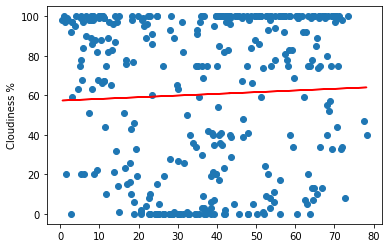

In [149]:
x=Northern['Lat']
y=Northern['Cloudiness']
plt.scatter(x,y)
plt.xlabel=('Lat')
plt.ylabel("Cloudiness %")

slope, intercept = np.polyfit(x, y, 1)
plt.plot(x, slope*x + intercept, color="red")

plt.show()

In [150]:
N_correlation=round(st.pearsonr(Northern['Lat'],Northern['Cloudiness'])[0],2)
N_correlation

0.04

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

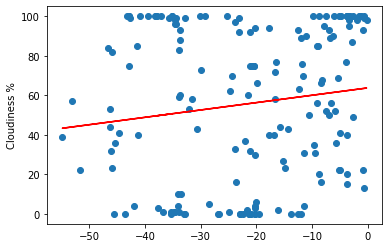

In [151]:
x=Southern['Lat']
y=Southern['Cloudiness']
plt.scatter(x,y)
plt.xlabel=('Lat')
plt.ylabel("Cloudiness %")

slope, intercept = np.polyfit(x, y, 1)
plt.plot(x, slope*x + intercept, color="red")

plt.show()

In [152]:
S_correlation=round(st.pearsonr(Southern['Lat'],Southern['Cloudiness'])[0],2)
S_correlation

0.14

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

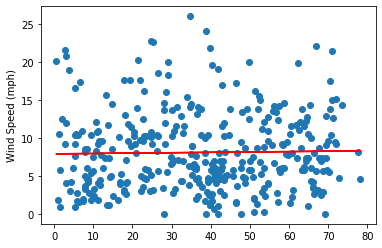

In [153]:
x=Northern['Lat']
y=Northern['Wind Speed']
plt.scatter(x,y)
plt.xlabel=('Lat')
plt.ylabel("Wind Speed (mph)")

slope, intercept = np.polyfit(x, y, 1)
plt.plot(x, slope*x + intercept, color="red")

plt.show()

In [154]:
N_correlation=round(st.pearsonr(Northern['Lat'],Northern['Wind Speed'])[0],2)
N_correlation

0.02

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

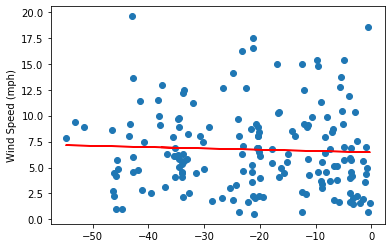

In [155]:
x=Southern['Lat']
y=Southern['Wind Speed']
plt.scatter(x,y)
plt.xlabel=('Lat')
plt.ylabel("Wind Speed (mph)")

slope, intercept = np.polyfit(x, y, 1)
plt.plot(x, slope*x + intercept, color="red")

plt.show()

In [156]:
N_correlation=round(st.pearsonr(Southern['Lat'],Southern['Wind Speed'])[0],2)
N_correlation

-0.04